In [3]:
import numpy as np
from scipy import signal as sig
from matplotlib import pyplot as plt
%matplotlib inline

#Question 2.2

The mean and standard deviation of $d$ are:

$$ \bar{d} = 0, \ \ \sigma_d = 1 $$

so the PDF of the data is:

$$ p(d) = \frac{1}{\sqrt{2\pi}} e^{-\frac{d^2}{2}} $$

Now, $ E = e^2 = (d - \bar{d})^2 = d^2 $ so the PDF of $E$ becomes:

$$ p(E) = p(d) \frac{dd}{dE} = \frac{1}{\sqrt{2\pi}} e^{-\frac{E}{2}} \frac{1}{2} E^{- \frac{1}{2}} $$

i.e.

$$ p(E) = \frac{1}{2 \sqrt{2 \pi E}} e^{-\frac{E}{2}} $$

Since $\sqrt{E}$ is in the dominator, $p(E) \rightarrow \infty$ as $E \rightarrow 0$ but as $E$ takes larger values, the terms $e^{-\frac{E}{2}}$ and $\frac{1}{\sqrt{E}}$ monotonically decrease so $p(E)$ converges to zero, which is what we see in the normalized histogram shown below.

In [14]:
mean = 0.
std = 1.
d2 = np.random.normal(mean, std, 1000)     # Gaussian random variables
pd2 = np.reciprocal(np.sqrt(2*np.pi) * std) * np.exp(- .5 / std**2 * (d2 - mean)**2)   #PDF of d
E2 = d2**2    # Generate E
pE2 = .5 * np.reciprocal(np.sqrt(2 * np.pi * E2)) * np.exp( - .5 *E2 )   # PDF of E

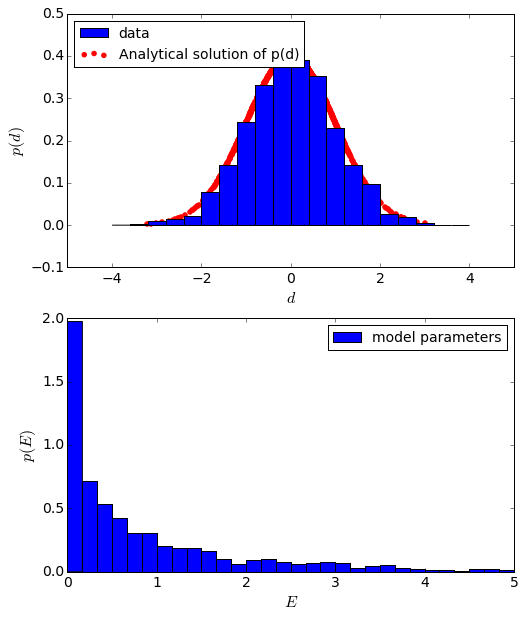

In [15]:
plt.figure( figsize=(8,10) )
plt.subplot(2,1,1)
plt.hist(d2, bins=20, range=[-4, 4], normed='True', label='data')
plt.scatter(d2, pd2, color='red', label='Analytical solution of p(d)') 
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$d$', fontsize=16)
plt.ylabel('$p(d)$', fontsize=16)
plt.subplot(2,1,2)
plt.hist(E2, bins=30, range=[0, 5], normed='True', label='model parameters')
# plt.scatter(E2, pE2, color='red', label='Analytical solution of p(E)') 
plt.legend(loc='upper right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$E$', fontsize=16)
plt.ylabel('$p(E)$', fontsize=16)

# Question 2.3

In [63]:
mean = 4.
std = 2.
d3 = np.random.normal(mean, std, 1000)  # Gaussian random variables

In [64]:
g3 = np.reciprocal(np.sqrt(2*np.pi) * std) * np.exp(- .5 / std**2 * (d3 - mean)**2)

In [65]:
hist_d3, bin_edge = np.histogram(d3)
print bin_edge, hist_d3

[-2.0534573  -0.87791333  0.29763065  1.47317462  2.64871859  3.82426257
  4.99980654  6.17535051  7.35089449  8.52643846  9.70198243] [  6  20  83 159 216 210 172  81  41  12]


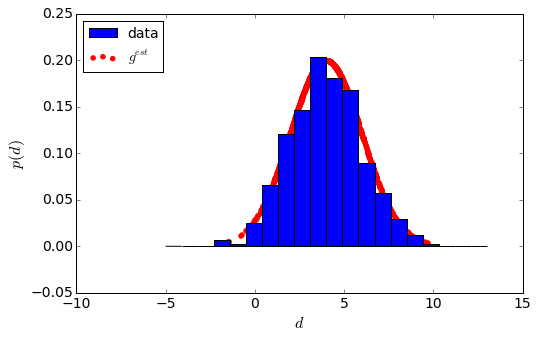

In [66]:
plt.figure(figsize=(8,5))
plt.hist(d3, bins=20, range=[-5, 13], normed='True', label='data')  # histogram of d
plt.scatter(d3, g3, color='red', label='$g^{est}$')   # scatter plot of g
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$d$', fontsize=16)
plt.ylabel('$p(d)$', fontsize=16)

In [67]:
out_d3 = d3.copy()
out_d3[out_d3 - mean <= 2*std] = np.nan  # Convert elements below the two standard deviations from the mean to nans

In [72]:
num_out_d3 = np.count_nonzero(~np.isnan(out_d3))  #Count number of non-nan valued elements
# print num_out_d, len(d)
print 'Percentage of elements larger than the mean by two standard deviations is: ', float(num_out_d3)/len(d3)*1e2, '%.'

Percentage of elements larger than the mean by two standard deviations is:  2.6 %.


This percentage, 2.6% is plausible since we are considering a Gausian distribution and the probability between two standard deviations is 95% so the probablity outside of the two standard deviations should be close to 2.5% on each side.

# Question 2.5

Since the data follows a uniform distribution, i.e. $ p(d) = 1$, we get:

$$ 3m^2 = p(m) = p(d(m)) \frac{dd}{dm} = \frac{dd}{dm} \ \ \ \therefore d = m^3 $$

The normalized histograms of $d$ and $m$ are shown below. We see that the PDF of $m$ follows the analytical solution $3m^2$.

In [22]:
d5 = np.random.uniform(low=0.0, high=1.0, size=1000)   # Generate random variables from a uniform distribution
m = d5**(1./3.)    # Generate m

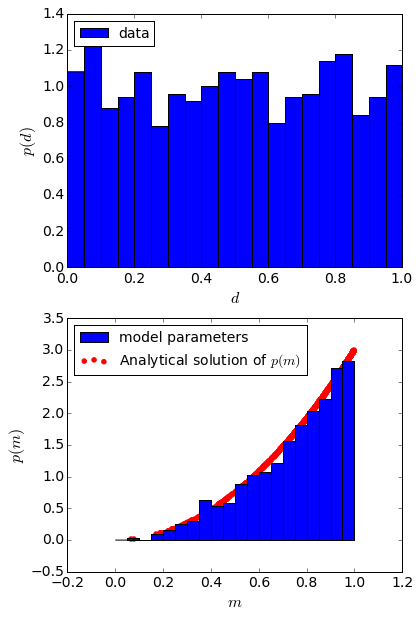

In [29]:
plt.figure( figsize=(6,10) )
plt.subplot(2,1,1)
plt.hist(d5, bins=20, range=[0, 1], normed='True', label='data')
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$d$', fontsize=16)
plt.ylabel('$p(d)$', fontsize=16)
plt.subplot(2,1,2)
plt.hist(m, bins=20, range=[0, 1], normed='True', label='model parameters')
plt.scatter(m, 3*m**2, color='red', label='Analytical solution of $p(m)$')
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$m$', fontsize=16)
plt.ylabel('$p(m)$', fontsize=16)